In [1]:
#1. Import Library

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1. Load dataset

df = pd.read_csv('ilustrasi k means.csv', sep = ';')
df.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


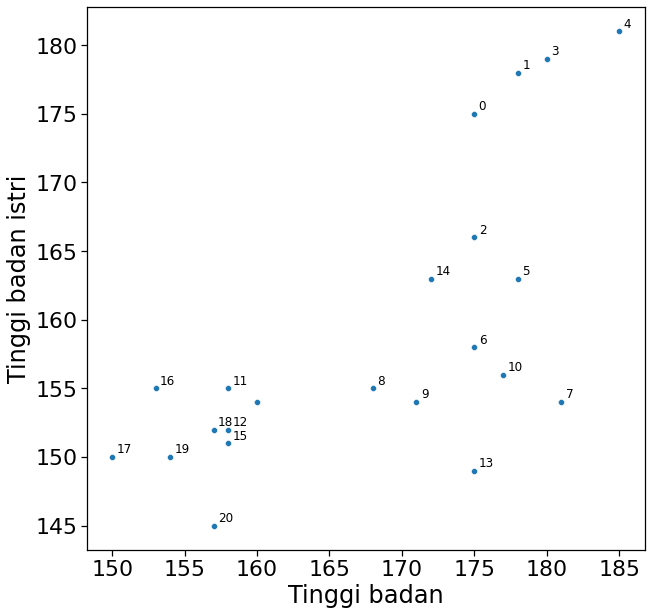

In [3]:
#2. Membuat plot

plt.figure(figsize = (10,10))

sns.set_context(context = 'notebook', font_scale = 2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df)

plt.ylabel('Tinggi badan istri')
plt.xlabel('Tinggi badan')

for i, txt in enumerate(range(0, df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)


__NOTES:__
<br> 
<br> rules

butuh standar scaler agar memudahkan dalam menentukan epsilon

In [6]:
#3. Initial Cluster

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

for eps in [i/10 for i in range(6,8)]:
    for min_samples in range(3,6):
        print('\n eps={}'.format(eps))
        print('min_samples={}'.format(min_samples))
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(X_scaled)
        silh = silhouette_score(X_scaled, labels)
        print("Clusters present: {}".format(np.unique(labels)))
        print("Clusters size: {}".format(np.bincount(labels +1)))
        print('Silhouette Score:{}'.format(silh))


 eps=0.6
min_samples=3
Clusters present: [-1  0  1  2]
Clusters size: [1 4 8 9]
Silhouette Score:0.4618572923610629

 eps=0.6
min_samples=4
Clusters present: [-1  0  1]
Clusters size: [7 6 9]
Silhouette Score:0.3901682187136734

 eps=0.6
min_samples=5
Clusters present: [-1  0  1]
Clusters size: [8 5 9]
Silhouette Score:0.35497113213899967

 eps=0.7
min_samples=3
Clusters present: [0 1 2]
Clusters size: [0 4 9 9]
Silhouette Score:0.6161772649616482

 eps=0.7
min_samples=4
Clusters present: [0 1 2]
Clusters size: [0 4 9 9]
Silhouette Score:0.6161772649616482

 eps=0.7
min_samples=5
Clusters present: [-1  0  1]
Clusters size: [4 9 9]
Silhouette Score:0.6161772649616482


__NOTES:__
<br> Ternyata silh paling besar itu 0.7, dengan minimum sampel 4.
<br> .....ketinggalan

In [ ]:
#insert notes bapaknya

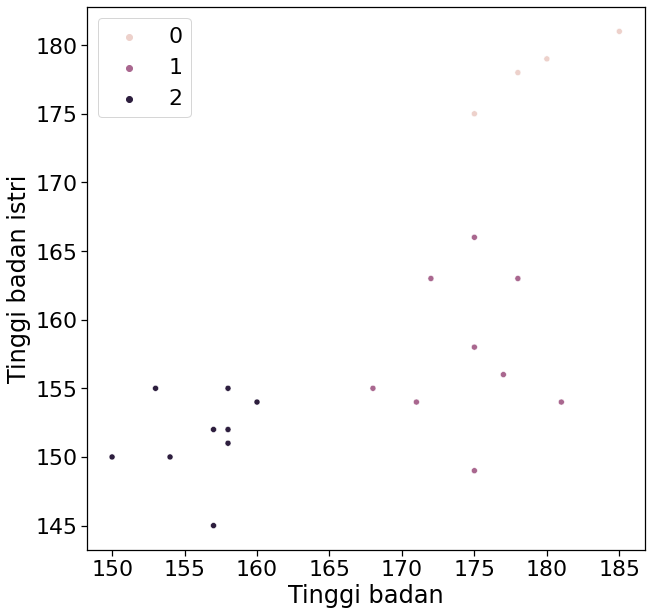

In [10]:
#Membuat plot hasil initial cluster

dbscan = DBSCAN(eps = 0.7, min_samples = 4)
labels = dbscan.fit_predict(X_scaled)
silh = silhouette_score(X_scaled, labels)


plt.figure(figsize = (10,10))

sns.set_context(context = 'notebook', font_scale = 2)
sns.scatterplot(
    x = df['tinggibadan'],
    y = df['tinggibadanistri'],
    hue = labels)

plt.ylabel('Tinggi badan istri')
plt.xlabel('Tinggi badan')

plt.show()

notes:
<br> -1 itu outliers